In [1]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading and Inspection Data

-  ### Import and Read Data

In [2]:
# Import and read dataset and stored in a variable called "df"
# Read the csv file using 'read_csv'

df = pd.read_csv("./Uber Request Data.csv")

-  ### Inspect the Dataframe

In [3]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
# Checking the number of rows and columns in the dataframe

df.shape

(6745, 6)

In [5]:
# Checking the column-wise info of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


# Cleaning the Data

In [6]:
# Getting the column-wise Null count using 'is.null()' alongwith the 'sum()' function

df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [7]:
# Getting the row-wise Null count the same way. This time just specify the axis as 1

df.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
6740    2
6741    2
6742    2
6743    2
6744    2
Length: 6745, dtype: int64

In [8]:
# Getting the percentages by dividing the sum obtained previously by the total length, multiplying it by 100 and 
# rounding it off to two decimal places

round(100*(df.isnull().sum()/len(df.index)), 2)

Request id            0.00
Pickup point          0.00
Driver id            39.29
Status                0.00
Request timestamp     0.00
Drop timestamp       58.03
dtype: float64

In [9]:
# Percentage of trips which got completed

round(df.loc[(df['Status'] == 'Trip Completed'),'Status'].count() / df['Request id'].count() * 100,2)

41.97

In [10]:
# Percentage of trips which got cancelled

round(df.loc[(df['Status'] == 'Cancelled'),'Status'].count() / df['Request id'].count() * 100,2)

18.74

In [11]:
# Percentage of trips whhich has no cars available-

round(df.loc[(df['Status'] == 'No Cars Available'),'Status'].count() / df['Request id'].count() * 100,2)

39.29

In [12]:
# Changing the Data Type of 'Request timestamp' and 'Drop timestamp' from 'object' to 'datetime'

df['Request Timestamp'] = pd.to_datetime(df['Request timestamp'])
df['Drop Timestamp'] = pd.to_datetime(df['Drop timestamp'])

In [13]:
# Removing the redundant columns using 'drop()' function

df.drop(['Drop timestamp','Request timestamp'], axis=1, inplace=True)

In [14]:
# Adding a new column 'Category' using 'Request Timestamp' column to define category of time as:
# 12 AM - 5 AM = Pre_Morning
# 5 AM - 10 AM = Morning_Rush
# 10 AM - 5 PM = Day_Time
# 5 PM - 10 PM = Evening_Rush
# 10 PM - 12 AM = Late_Night

df['Category'] = "Late_Night"
df.loc[(df['Request Timestamp'].dt.hour>=0) & (df['Request Timestamp'].dt.hour<5),['Category']] = 'Pre_Morning'
df.loc[(df['Request Timestamp'].dt.hour>=5) & (df['Request Timestamp'].dt.hour<10),['Category']] = 'Morning_Rush'
df.loc[(df['Request Timestamp'].dt.hour>=10) & (df['Request Timestamp'].dt.hour<17),['Category']] = 'Day_Time'
df.loc[(df['Request Timestamp'].dt.hour>=17) & (df['Request Timestamp'].dt.hour<22),['Category']] = 'Evening_Rush'

In [15]:
# Checking the column-wise info of the dataframe after manipulation

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request Timestamp  6745 non-null   datetime64[ns]
 5   Drop Timestamp     2831 non-null   datetime64[ns]
 6   Category           6745 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 369.0+ KB


In [16]:
# Inspecting the dataframe after manipulation

df.head()

,Request id,Pickup point,Driver id,Status,Request Timestamp,Drop Timestamp,Category
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,Day_Time
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,Evening_Rush
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Morning_Rush


# Data Analysis

In [17]:
# Number of 'Request id' with 'Status'

df.groupby('Status')['Request id'].count()

Status
Cancelled            1264
No Cars Available    2650
Trip Completed       2831
Name: Request id, dtype: int64

Text(0, 0.5, '')

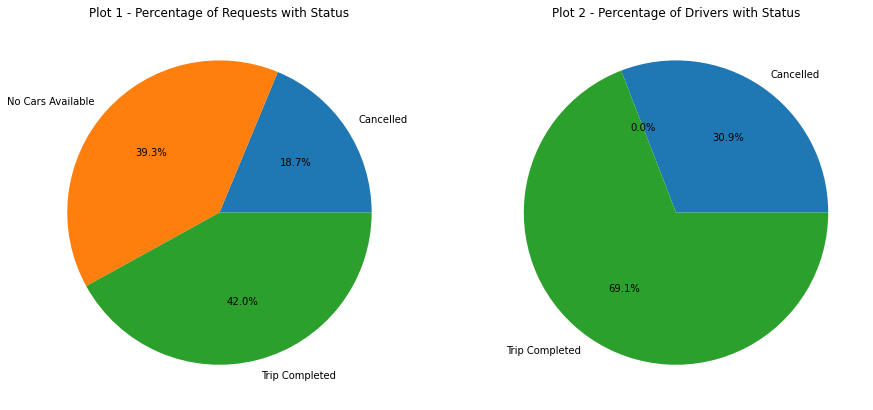

In [18]:
# Plot 1 - Shows the percentage of 'Requests id' with their status.

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
df.groupby('Status')['Request id'].count().plot(kind='pie', autopct='%1.1f%%')
plt.title('Plot 1 - Percentage of Requests with Status')
plt.xlabel('')
plt.ylabel('')

# Plot 2 - Shows the percentage of 'Driver id' with their status.
plt.subplot(1,2,2)
df.groupby('Status')['Driver id'].count().plot(kind='pie', autopct='%1.1f%%')
plt.title('Plot 2 - Percentage of Drivers with Status')
plt.xlabel('')
plt.ylabel('')

In [19]:
# Number of 'Request id' at 'Pickup Point'

df.groupby('Pickup point')['Request id'].count()

Pickup point
Airport    3238
City       3507
Name: Request id, dtype: int64

In [20]:
# NUmber of 'Driver id' at 'Pickup Point'

df.groupby('Pickup point')['Driver id'].count()

Pickup point
Airport    1525
City       2570
Name: Driver id, dtype: int64

Text(0, 0.5, '')

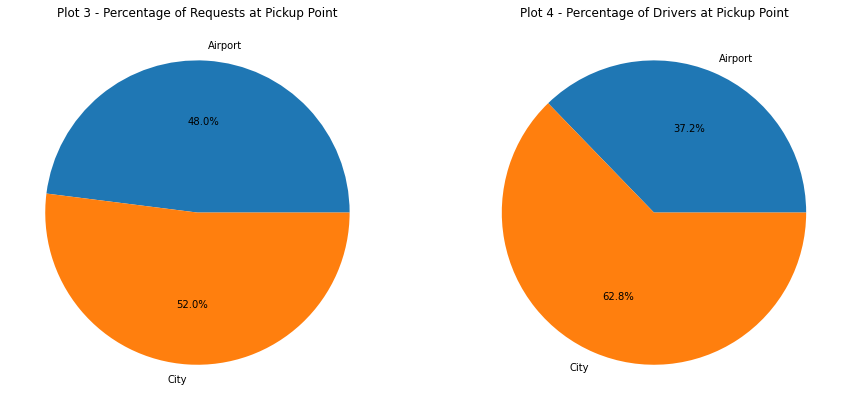

In [21]:
# Plot 3 - Percentage of 'Requests' at 'Pickup Point'

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
df.groupby('Pickup point')['Request id'].count().plot(kind='pie', autopct='%1.1f%%')
plt.title('Plot 3 - Percentage of Requests at Pickup Point')
plt.xlabel('')
plt.ylabel('')

# Plot 4 - Percentage of 'Drivers' at 'Pickup Point'
plt.subplot(1,2,2)
df.groupby('Pickup point')['Driver id'].count().plot(kind='pie', autopct='%1.1f%%')
plt.title('Plot 4 - Percentage of Drivers at Pickup Point')
plt.xlabel('')
plt.ylabel('')

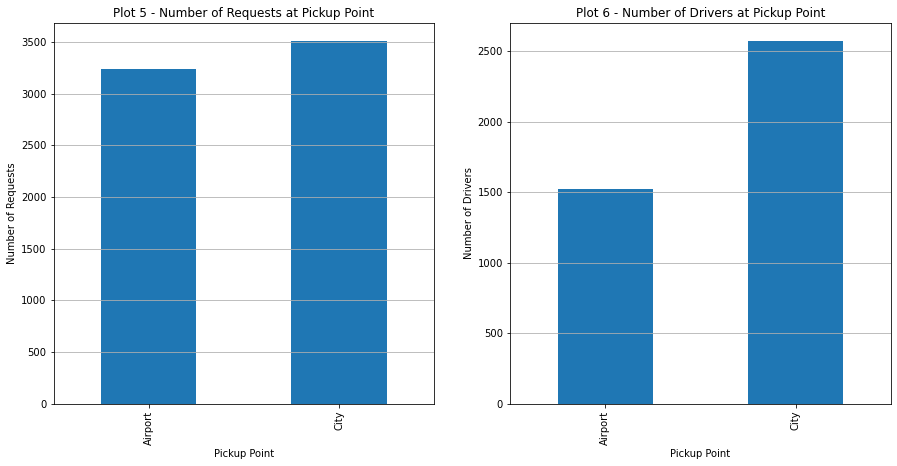

In [22]:
# Plot 5 - Number of 'Requests' at 'Pickup Point'

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
df.groupby('Pickup point')['Request id'].count().plot(kind='bar')
plt.title('Plot 5 - Number of Requests at Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Number of Requests')
plt.grid(axis='y')

# Plot 6 - Number of 'Drivers' at 'Pickup Point'
plt.subplot(1,2,2)
df.groupby('Pickup point')['Driver id'].count().plot(kind='bar')
plt.title('Plot 6 - Number of Drivers at Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Number of Drivers')
plt.grid(axis='y')

In [23]:
# Calculating 'Status' of 'Request id' at 'Pickup Point'

pd.pivot_table(df, index=['Pickup point'], columns=['Status'], values=['Request id'], aggfunc='count')

Request id                                 
Status        Cancelled No Cars Available Trip Completed
Pickup point                                            
Airport             198              1713           1327
City               1066               937           1504

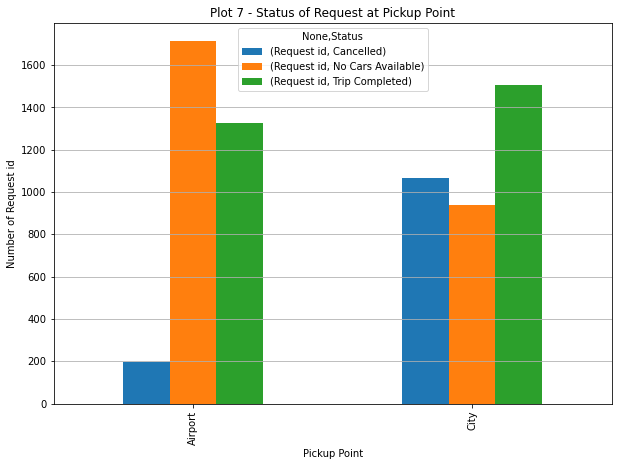

In [24]:
# PLot 7 - 'Status' of 'Request id' at 'Pickup Point'

pd.pivot_table(df, index=['Pickup point'], columns=['Status'], values=['Request id'], aggfunc='count').plot(kind='bar', figsize=(10,7))
plt.title("Plot 7 - Status of Request at Pickup Point")
plt.xlabel("Pickup Point")
plt.ylabel("Number of Request id")
plt.grid(axis='y')

In [25]:
# Number of 'Request id' in each time 'Category'

df.groupby('Category')['Request id'].count()

Category
Day_Time        1224
Evening_Rush    2342
Late_Night       498
Morning_Rush    2103
Pre_Morning      578
Name: Request id, dtype: int64

In [26]:
# Number of 'Driver id' in each time 'Category'

df.groupby('Category')['Driver id'].count()

Category
Day_Time         890
Evening_Rush     950
Late_Night       279
Morning_Rush    1697
Pre_Morning      279
Name: Driver id, dtype: int64

Text(0, 0.5, '')

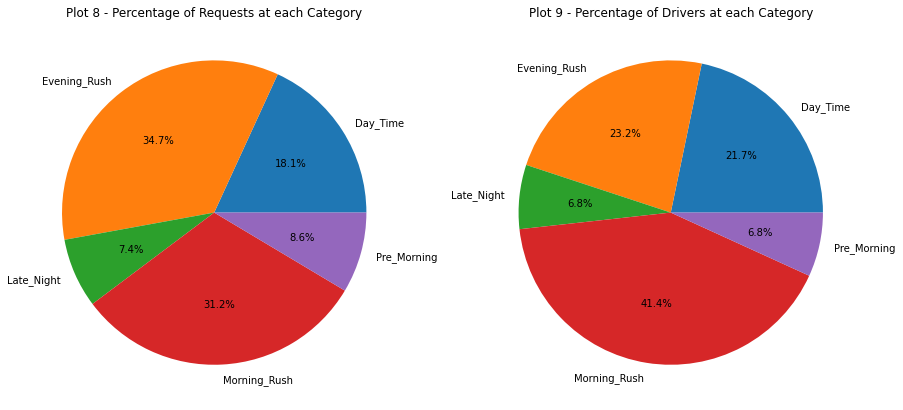

In [27]:
# Plot 8 - Percentage of 'Request id' in each 'Category'

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
df.groupby('Category')['Request id'].count().plot(kind='pie', autopct='%1.1f%%')
plt.title('Plot 8 - Percentage of Requests at each Category')
plt.xlabel('')
plt.ylabel('')

# Plot 9 - Percentage of 'Driver id' in each 'Category'
plt.subplot(1,2,2)
df.groupby('Category')['Driver id'].count().plot(kind='pie', autopct='%1.1f%%')
plt.title('Plot 9 - Percentage of Drivers at each Category')
plt.xlabel('')
plt.ylabel('')

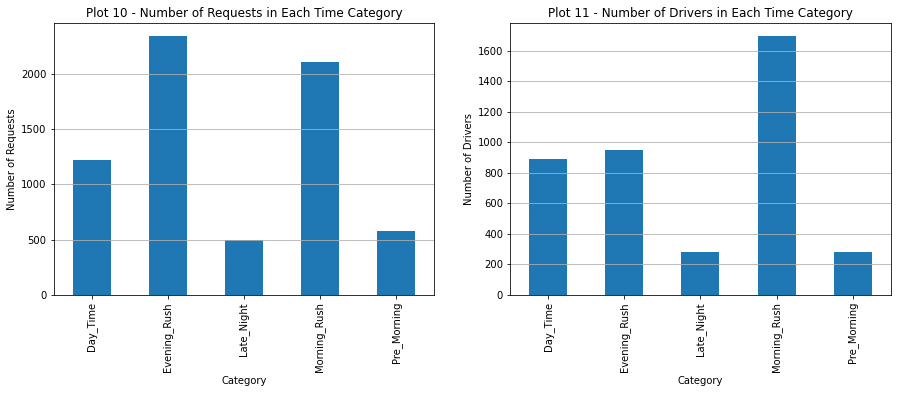

In [28]:
# Plot 10 - Showing the number of 'Requests' in each time category.

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df.groupby('Category')['Request id'].count().plot(kind='bar')
plt.title('Plot 10 - Number of Requests in Each Time Category')
plt.xlabel('Category')
plt.ylabel('Number of Requests')
plt.grid(axis='y')

# Plot 11 - Showing the number of 'Drivers' in each time category.
plt.subplot(1,2,2)
df.groupby('Category')['Driver id'].count().plot(kind='bar')
plt.title('Plot 11 - Number of Drivers in Each Time Category')
plt.xlabel('Category')
plt.ylabel('Number of Drivers')
plt.grid(axis='y')

In [29]:
# Difference of 'Request id' and 'Driver' in each time 'Category'

df.groupby('Category')['Request id'].count() - df.groupby('Category')['Driver id'].count()

Category
Day_Time         334
Evening_Rush    1392
Late_Night       219
Morning_Rush     406
Pre_Morning      299
dtype: int64

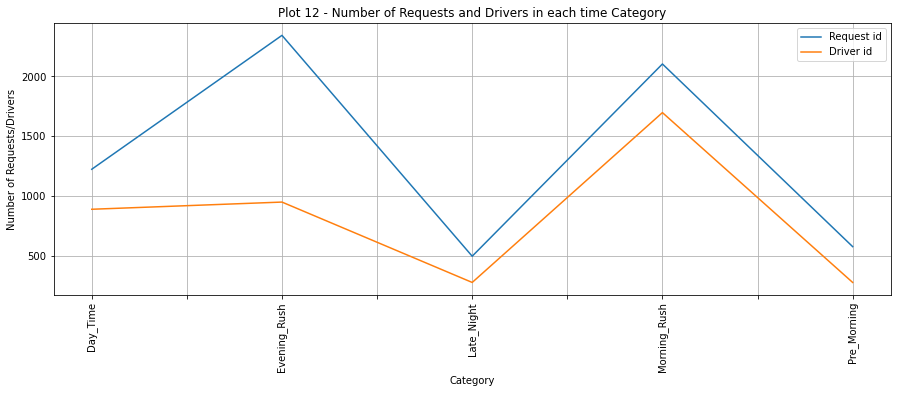

In [30]:
# Plot 12 - Demand and Supply plot which shows the difference of number of 'Requests' and 'Drivers'
#           in each time 'Category'.

plt.figure(figsize=(15,5))
df.groupby('Category')['Request id'].count().plot(kind='line')
df.groupby('Category')['Driver id'].count().plot(kind='line')
plt.title('Plot 12 - Number of Requests and Drivers in each time Category')
plt.xlabel('Category')
plt.ylabel('Number of Requests/Drivers')
plt.xticks(rotation=90)
plt.legend()
plt.grid()

In [31]:
# 'Status' of 'Request id' in each time 'Category'

pd.pivot_table(df, index=['Status'], columns=['Category'], values=['Request id'], aggfunc='count')

Request id                                                 
Category            Day_Time Evening_Rush Late_Night Morning_Rush Pre_Morning
Status                                                                       
Cancelled                168          166         22          843          65
No Cars Available        334         1392        219          406         299
Trip Completed           722          784        257          854         214

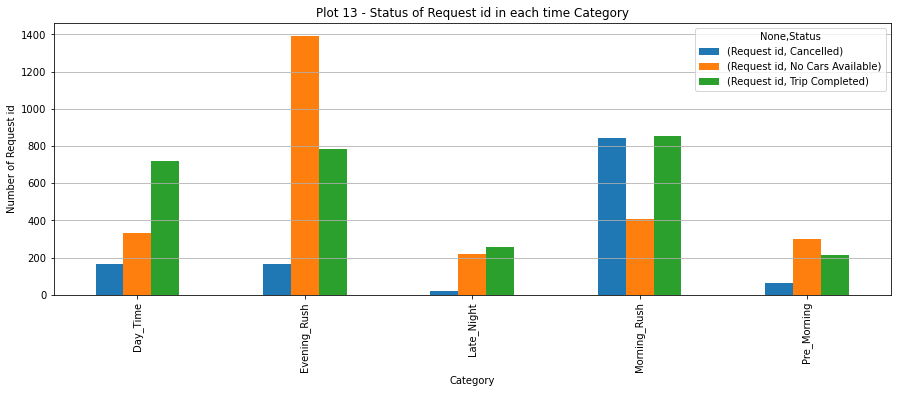

In [32]:
# Plot 13 - 'Status' of 'Request id' in each time category

pd.pivot_table(df, index=['Category'], columns=['Status'], values=['Request id'], aggfunc='count').plot(kind='bar', figsize=(15,5))
plt.title("Plot 13 - Status of Request id in each time Category")
plt.xlabel("Category")
plt.ylabel("Number of Request id")
plt.grid(axis='y')

In [33]:
# Calculating the number of 'Request id' at 'Pickup point' in each time category

df.groupby(['Pickup point','Category'])['Request id'].count()

Pickup point  Category    
Airport       Day_Time         478
              Evening_Rush    1800
              Late_Night       281
              Morning_Rush     426
              Pre_Morning      253
City          Day_Time         746
              Evening_Rush     542
              Late_Night       217
              Morning_Rush    1677
              Pre_Morning      325
Name: Request id, dtype: int64

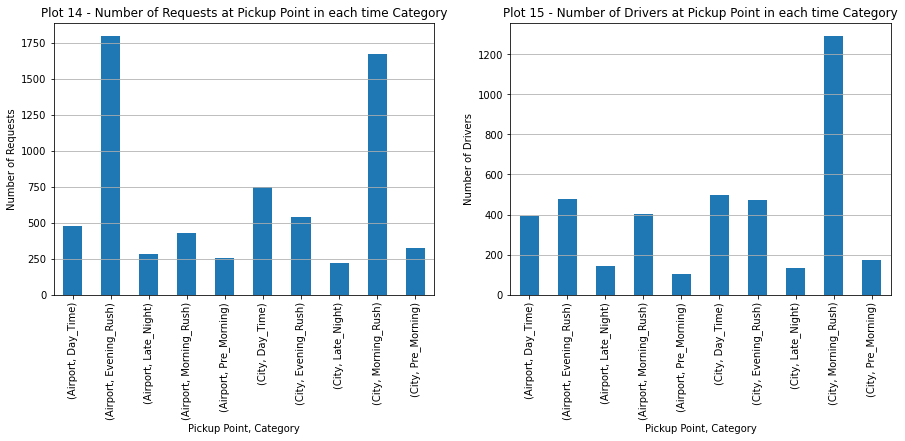

In [34]:
# Plot 14 - Showing the number of 'Requests' at 'Pickup point' in each time 'Category'.

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df.groupby(['Pickup point','Category'])['Request id'].count().plot(kind='bar')
plt.title('Plot 14 - Number of Requests at Pickup Point in each time Category')
plt.xlabel('Pickup Point, Category')
plt.ylabel('Number of Requests')
plt.grid(axis='y')

# Plot 15 - Showing the number of 'Drivers' at 'Pickup point' in each time 'Category'.
plt.subplot(1,2,2)
df.groupby(['Pickup point','Category'])['Driver id'].count().plot(kind='bar')
plt.title('Plot 15 - Number of Drivers at Pickup Point in each time Category')
plt.xlabel('Pickup Point, Category')
plt.ylabel('Number of Drivers')
plt.grid(axis='y')

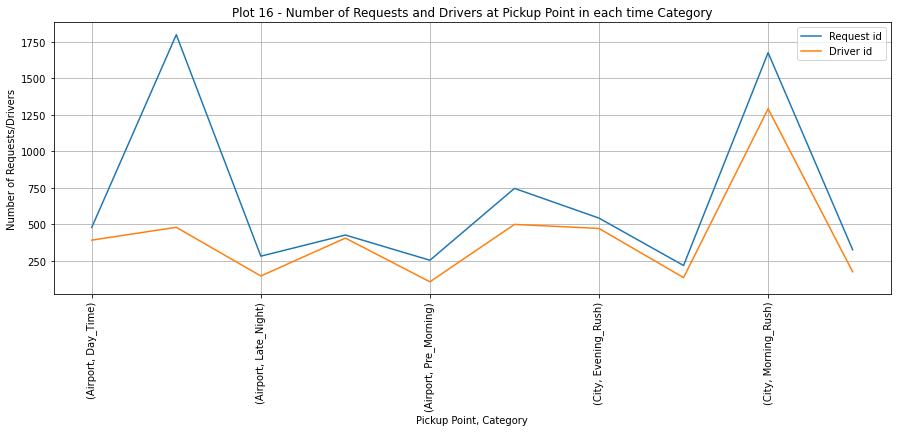

In [35]:
# Plot 16 - Demand and Supply plot which shows the difference of number of 'Requests' and 'Drivers'
#           at 'Pickup point' in each time 'Category'.

plt.figure(figsize=(15,5))
df.groupby(['Pickup point','Category'])['Request id'].count().plot(kind='line')
df.groupby(['Pickup point','Category'])['Driver id'].count().plot(kind='line')
plt.title('Plot 16 - Number of Requests and Drivers at Pickup Point in each time Category')
plt.xlabel('Pickup Point, Category')
plt.ylabel('Number of Requests/Drivers')
plt.xticks(rotation=90)
plt.legend()
plt.grid()

In [36]:
# Calculating the most cancelled Requests at Pickup Point in each time Category using 'pd.pivot_table()' 
# and storing it to 'request_status' variable

request_status = pd.pivot_table(df, columns=['Status'], index=['Category','Pickup point'], values=['Request id'], aggfunc='count')
request_status

Request id                                 
Status                     Cancelled No Cars Available Trip Completed
Category     Pickup point                                            
Day_Time     Airport              64                87            327
             City                104               247            395
Evening_Rush Airport             106              1321            373
             City                 60                71            411
Late_Night   Airport               3               136            142
             City                 19                83            115
Morning_Rush Airport              23                21            382
             City                820               385            472
Pre_Morning  Airport               2               148            103
             City                 63               151            111

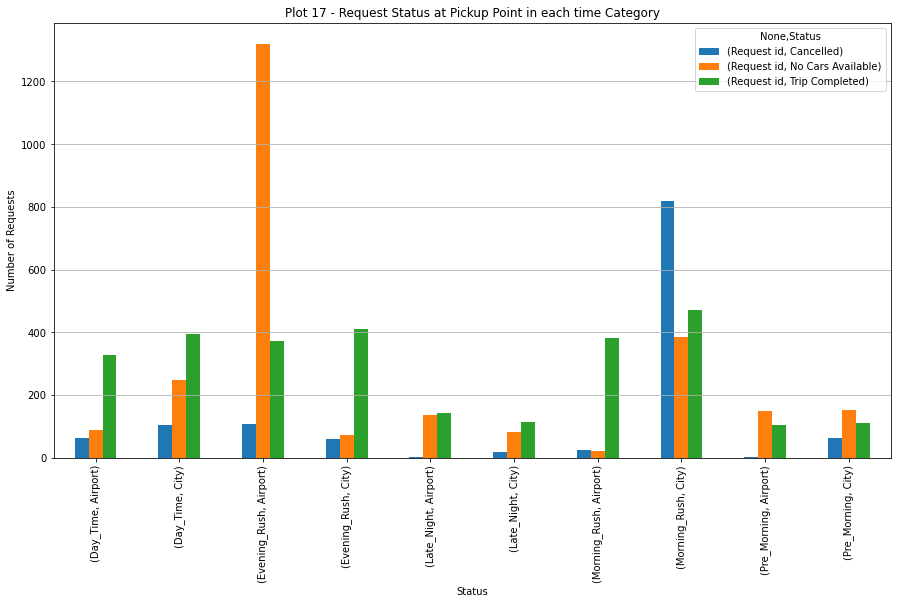

In [37]:
# Plot 17 - 'Status' of 'Request id' at 'Pickup point' in each time 'Category' using 'request_status'.

request_status.plot(kind='bar', figsize=(15,8))
plt.title("Plot 17 - Request Status at Pickup Point in each time Category")
plt.xlabel("Status")
plt.ylabel("Number of Requests")
plt.grid(axis='y')

# Demand - Supply Gap

In [40]:
# Creating 3 new columns 'Demand', 'Supply' and 'Gap' which indicate the status of the request:
# For all the 'Request id', Demand = 1 (as people are demanding for cabs)
# For all the 'Request id' where 'Status' = 'Trip Completed', Supply = 1(as their demands were satisfied)
# For all the 'Request id' where 'Status' = 'Cancelled', 'No Cars Available', Gap = 1(as their demands were not satisfied)

df['Demand'] = 1
df['Supply'] = 0
df['Gap'] = 0
df.loc[(df['Status'] == 'Trip Completed'),'Supply'] = 1
df.loc[(df['Status'] == 'Cancelled') | (df['Status'] == 'No Cars Available'),'Gap'] = 1

In [41]:
# Calculating the 'Demand', 'Supply' and 'Gap' and storing it to varoable 'DSG'

DSG = df.loc[:,['Demand','Supply','Gap']].sum()
DSG

Demand    6745
Supply    2831
Gap       3914
dtype: int64

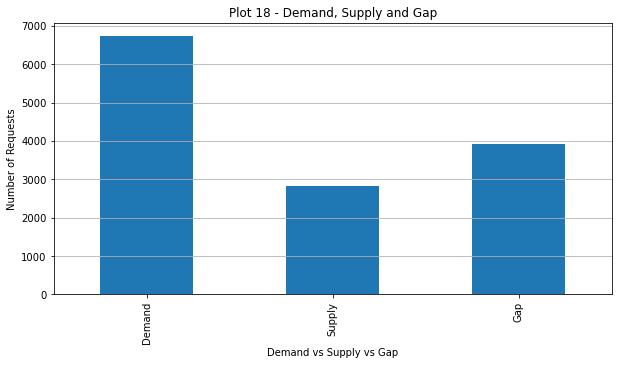

In [42]:
# Plot 18 - Showing the 'Demand', 'Supply' and 'Gap' using variable 'DSG'

DSG.plot(kind='bar', figsize=(10,5))
plt.title("Plot 18 - Demand, Supply and Gap")
plt.xlabel("Demand vs Supply vs Gap")
plt.ylabel("Number of Requests")
plt.grid(axis='y')

In [43]:
# Calculating the 'Gap' between 'Demand' and 'Supply' at 'Pickup point' and storing it in variable 'DSG_p'

DSG_p = pd.pivot_table(df, index=['Pickup point'], values=['Demand','Supply','Gap'], aggfunc='sum')
DSG_p

,Demand,Gap,Supply
Pickup point,,,
Airport,3238,1911,1327
City,3507,2003,1504


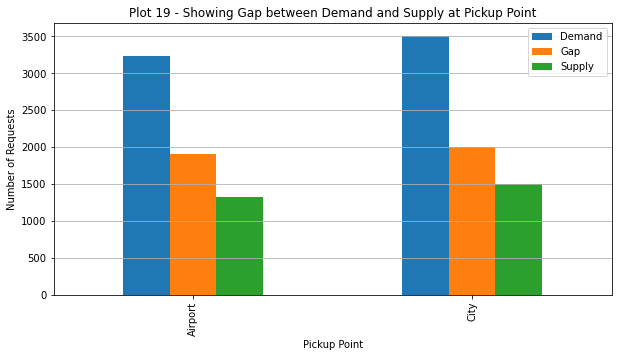

In [44]:
# Plot 19 - Showing the 'Gap' between 'Demand' and 'Supply' at 'Pickup point' using variable 'DSG_p'

DSG_p.plot(kind='bar', figsize=(10,5))
plt.title("Plot 19 - Showing Gap between Demand and Supply at Pickup Point")
plt.xlabel("Pickup Point")
plt.ylabel("Number of Requests")
plt.grid(axis='y')

In [45]:
# Calculating the 'Gap' between 'Demand' and 'Supply' in each time 'Category' and storing it in variable 'DSG_c'

DSG_c = pd.pivot_table(df, index=['Category'], values=['Demand','Supply','Gap'], aggfunc='sum')
DSG_c

,Demand,Gap,Supply
Category,,,
Day_Time,1224,502,722
Evening_Rush,2342,1558,784
Late_Night,498,241,257
Morning_Rush,2103,1249,854
Pre_Morning,578,364,214


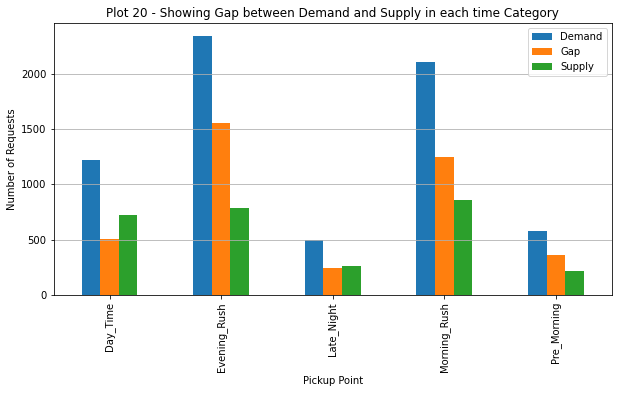

In [46]:
# Plot 20 - Showing the 'Gap' between 'Demand' and 'Supply' in each time 'Category' using variable 'DSG_c'

DSG_c.plot(kind='bar', figsize=(10,5))
plt.title("Plot 20 - Showing Gap between Demand and Supply in each time Category")
plt.xlabel("Pickup Point")
plt.ylabel("Number of Requests")
plt.grid(axis='y')

In [47]:
# Calculating the 'Gap' between 'Demand' and 'Supply' at 'Pickup Point' in each time 'Category'
# and storing it in variable 'DSG_pc'

DSG_pc = pd.pivot_table(df, index=['Pickup point','Category'], values=['Demand','Supply','Gap'], aggfunc='sum')
DSG_pc

Demand   Gap  Supply
Pickup point Category                          
Airport      Day_Time         478   151     327
             Evening_Rush    1800  1427     373
             Late_Night       281   139     142
             Morning_Rush     426    44     382
             Pre_Morning      253   150     103
City         Day_Time         746   351     395
             Evening_Rush     542   131     411
             Late_Night       217   102     115
             Morning_Rush    1677  1205     472
             Pre_Morning      325   214     111

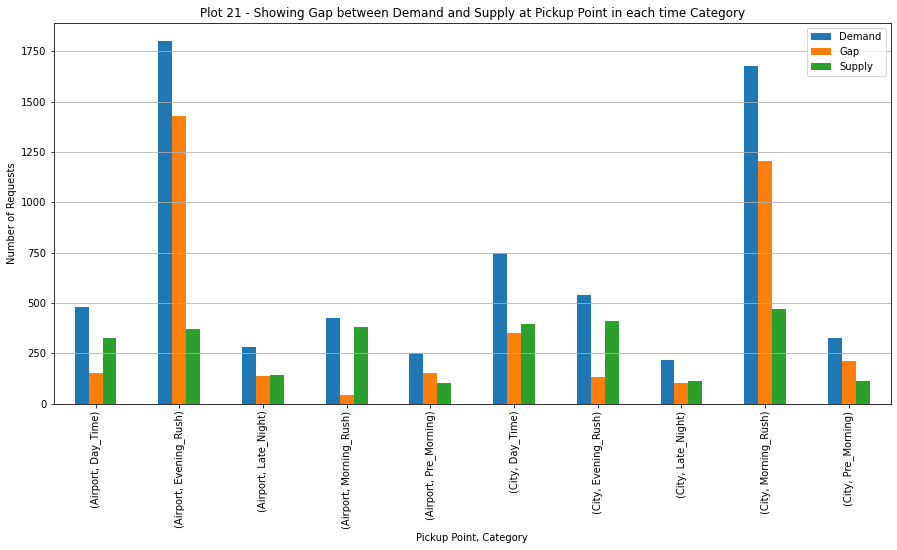

In [48]:
# Plot 21 - Showing the 'Gap' between 'Demand' and 'Supply' at 'Pickup Point' in each time 'Category' using variable 'DSG_pc'

DSG_pc.plot(kind='bar', figsize=(15,7))
plt.title("Plot 21 - Showing Gap between Demand and Supply at Pickup Point in each time Category")
plt.xlabel("Pickup Point, Category")
plt.ylabel("Number of Requests")
plt.grid(axis='y')

In [56]:
# Calculating the 'Driver id' who cancels most 'Request' and storing it to variable 'driver_cancelled'

driver_cancelled = df[(df['Status'] == 'Cancelled')]
driver_cancelled.head()

,Request id,Pickup point,Driver id,Status,Request Timestamp,Drop Timestamp,Category,Demand,Supply,Gap
2831,2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT,Morning_Rush,1,0,1
2832,4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaT,Evening_Rush,1,0,1
2833,5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,NaT,Evening_Rush,1,0,1
2834,5927,City,1.0,Cancelled,2016-07-15 10:12:40,NaT,Day_Time,1,0,1
2835,2347,Airport,2.0,Cancelled,2016-12-07 19:14:00,NaT,Evening_Rush,1,0,1


In [57]:
# Calculating the top 10 'Driver id' who cancels most 'Request' and storing it to variable 'top_10_driver_cancelled'

top_10_driver_cancelled = driver_cancelled.groupby('Driver id')['Status'].count().sort_values(ascending=False).head(10)
top_10_driver_cancelled.head()

Driver id
84.0     12
54.0     11
142.0    10
206.0    10
166.0     9
Name: Status, dtype: int64

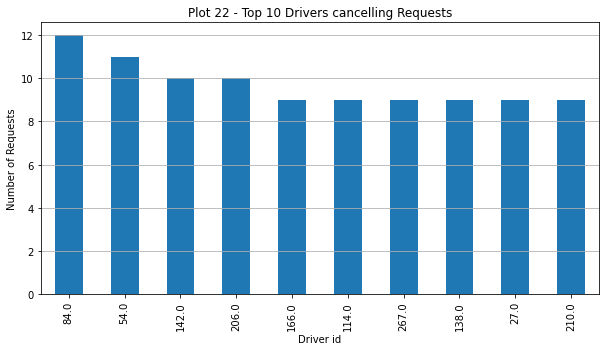

In [51]:
# Plot 22 - Showing top 10 'Driver id' who cancels most 'Requests'

top_10_driver_cancelled.plot(kind='bar', figsize=(10,5))
plt.title("Plot 22 - Top 10 Drivers cancelling Requests")
plt.xlabel("Driver id")
plt.ylabel("Number of Requests")
plt.grid(axis='y')

In [58]:
# Calculating the 'Driver id' who completed most 'Request' and storing it to variable 'driver_completed'

driver_completed = df[(df['Status'] == 'Trip Completed')]
driver_completed.head()

,Request id,Pickup point,Driver id,Status,Request Timestamp,Drop Timestamp,Category,Demand,Supply,Gap
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,Day_Time,1,1,0
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,Evening_Rush,1,1,0
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,Morning_Rush,1,1,0
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,Evening_Rush,1,1,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Morning_Rush,1,1,0


In [59]:
# Calculating the top 10 'Driver id' who completed most 'Request' and storing it to variable 'top_10_driver_completed'

top_10_driver_completed = driver_completed.groupby('Driver id')['Status'].count().sort_values(ascending=False).head(10)
top_10_driver_completed.head()

Driver id
22.0     16
184.0    15
233.0    15
70.0     14
176.0    14
Name: Status, dtype: int64

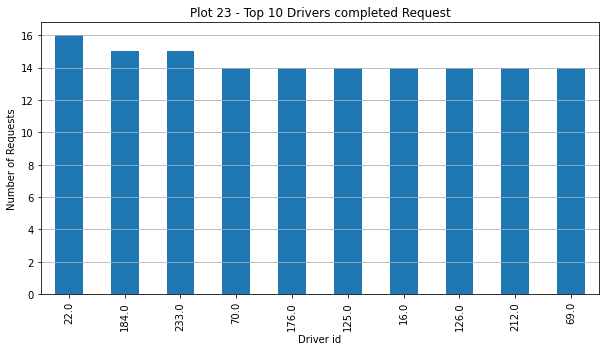

In [54]:
# Plot 23 - Showing the 'Driver id' who completed most 'Request'

top_10_driver_completed.plot(kind='bar', figsize=(10,5))
plt.title("Plot 23 - Top 10 Drivers completed Request")
plt.xlabel("Driver id")
plt.ylabel("Number of Requests")
plt.grid(axis='y')

In [55]:
# Saving the processed data to 'excel' file

df.to_excel("Uber DSG.xlsx")